### Import the relevant libraries

In [406]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [407]:
data = pd.read_csv('BostonHousing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Univariate Analysis

In [408]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [409]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [410]:
selected_dataframe = data
columns_with_nan = ""; 
print(f'{[x for x in globals() if globals()[x] is selected_dataframe][0]} analysis: \n shape: {selected_dataframe.shape}, rows: {selected_dataframe.shape[0]}, columns: {selected_dataframe.shape[1]}\n columns names are: {", ".join(selected_dataframe.columns.values.tolist())}\n NaN values: {selected_dataframe.isna().values.any()} {"".join([columns_with_nan + _ + ", " for _ in selected_dataframe.columns.values if selected_dataframe[_].isna().values.any() == True])}\n duplicates: {selected_dataframe.duplicated().any()}\n sample data: \n{selected_dataframe.sample(5)}')

data analysis: 
 shape: (506, 14), rows: 506, columns: 14
 columns names are: crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv
 NaN values: False 
 duplicates: False
 sample data: 
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
244  0.20608  22.0   5.86     0  0.431  5.593  76.5  7.9549    7  330   
458  7.75223   0.0  18.10     0  0.713  6.301  83.7  2.7831   24  666   
269  0.09065  20.0   6.96     1  0.464  5.920  61.5  3.9175    3  223   
170  1.20742   0.0  19.58     0  0.605  5.875  94.6  2.4259    5  403   
232  0.57529   0.0   6.20     0  0.507  8.337  73.3  3.8384    8  307   

     ptratio       b  lstat  medv  
244     19.1  372.49  12.50  17.6  
458     20.2  272.21  16.23  14.9  
269     18.6  391.34  13.65  20.7  
170     14.7  292.29  14.43  17.4  
232     17.4  385.91   2.47  41.7  


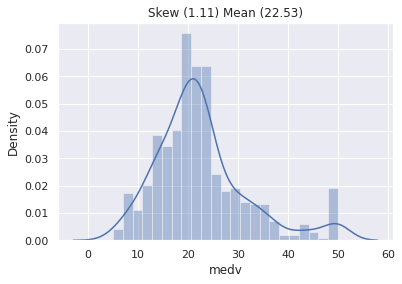

In [411]:
medv_skew = round(data['medv'].skew(), 2)
medv_mean = round(data['medv'].mean(), 2)
sns.distplot(data['medv'])
plt.title(f'Skew ({medv_skew}) Mean ({medv_mean})')
plt.show()

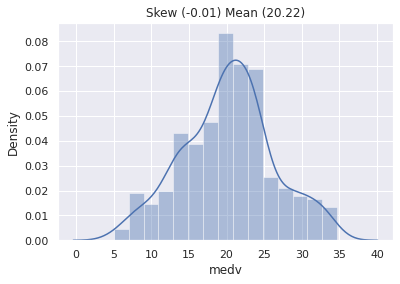

In [412]:
q = data['medv'].quantile(0.9)
data = data[data['medv']<q]

# data['medv'] = np.log(data['medv'])

medv_skew = round(data['medv'].skew(), 2)
medv_mean = round(data['medv'].mean(), 2)
sns.distplot(data['medv'])
plt.title(f'Skew ({medv_skew}) Mean ({medv_mean})')
plt.show()

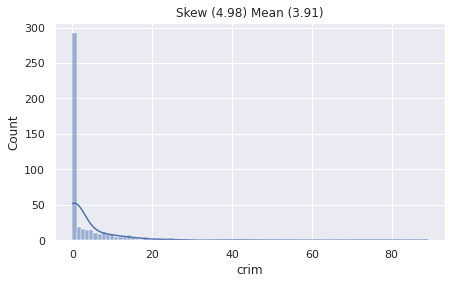

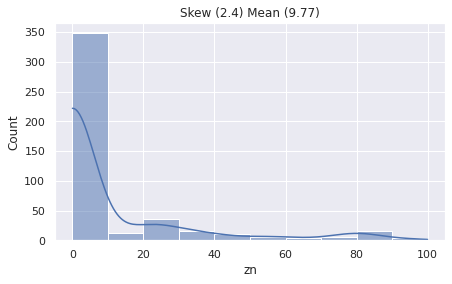

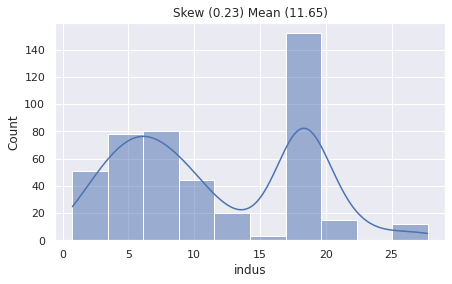

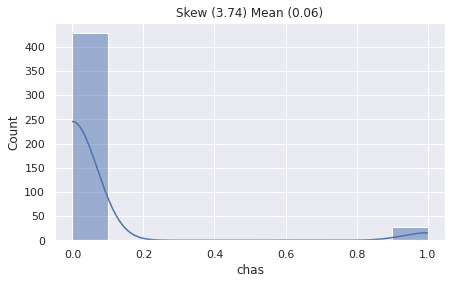

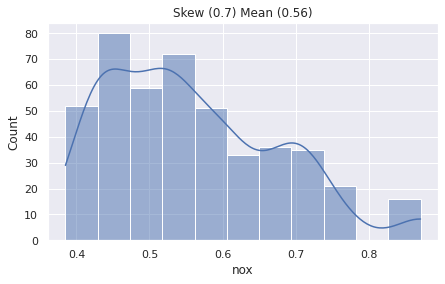

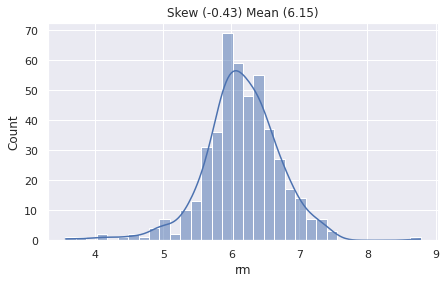

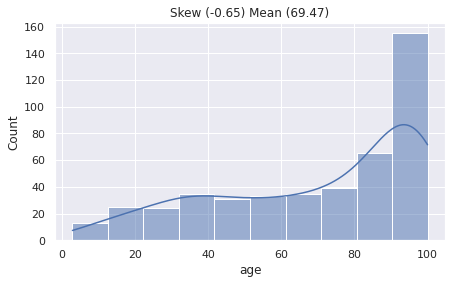

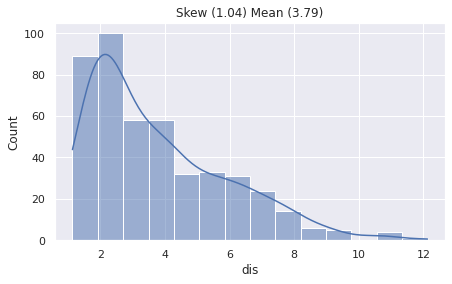

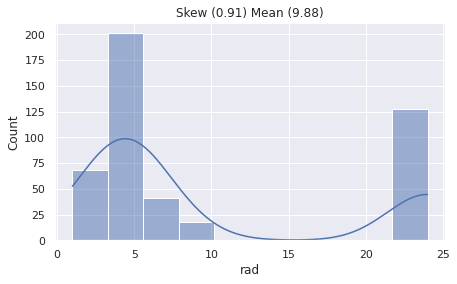

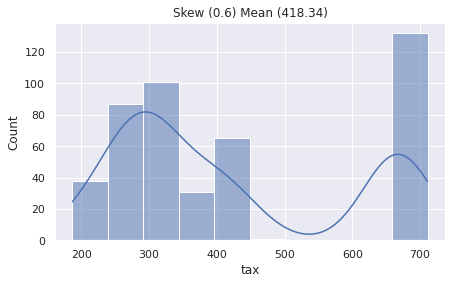

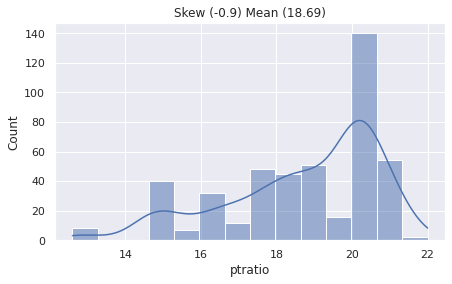

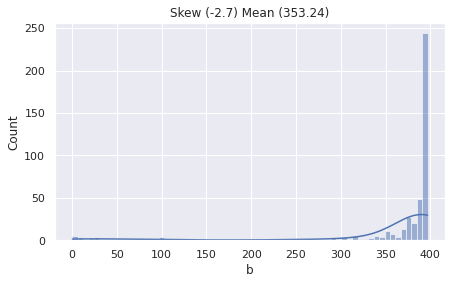

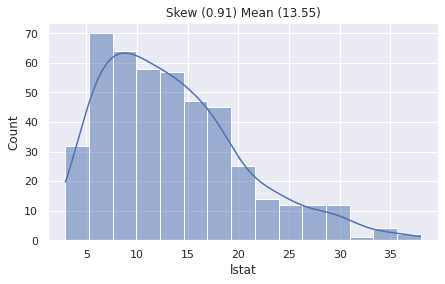

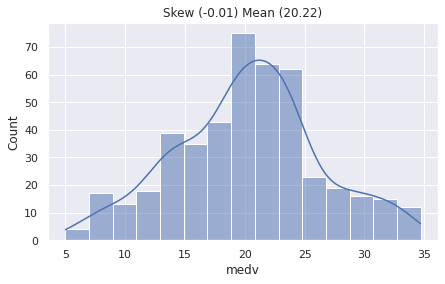

In [413]:
for i in data.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=data, x=i, kde = True)
    data_skew = round(data[i].skew(), 2)
    data_mean = round(data[i].mean(), 2)
    plt.title(f'Skew ({data_skew}) Mean ({data_mean})')
    plt.show()

## Bivariate Analysis

In [436]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data.drop('medv', axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

AttributeError: ignored

In [415]:
# sns.pairplot(x, kind="kde")
# plt.plot()

Output hidden; open in https://colab.research.google.com to view.

[]

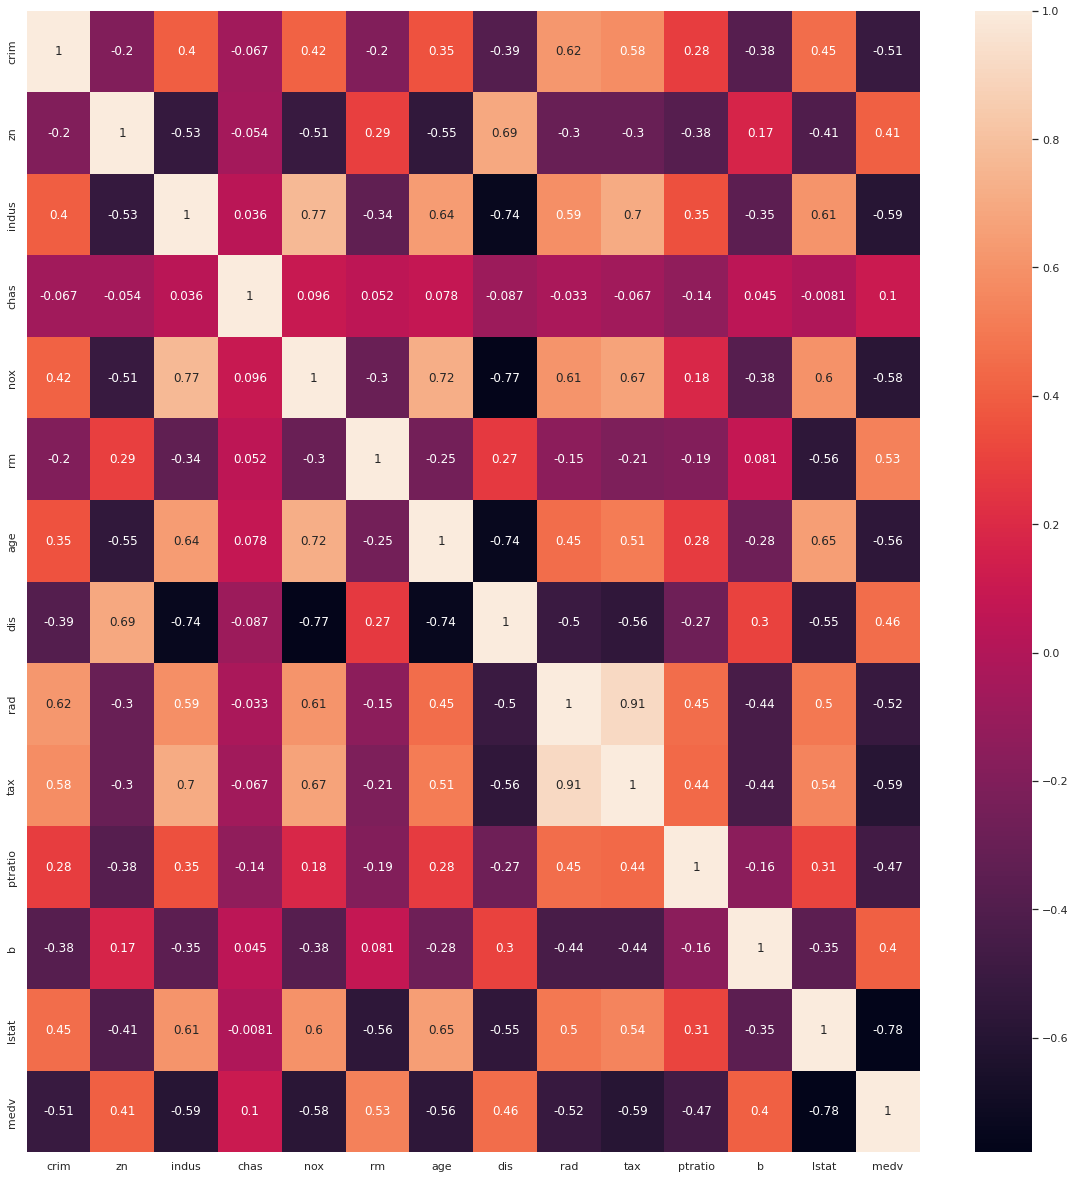

In [416]:
# checking the bivariate relationship between the variables
plt.figure(figsize=(20,21))
sns.heatmap(data.corr(),annot=True)
plt.plot()

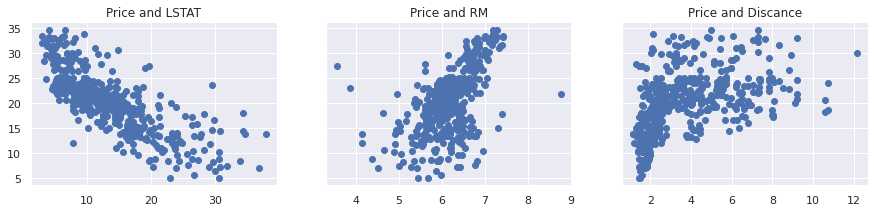

In [417]:
# checking relationsip between selected data
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['lstat'],data['medv'])
ax1.set_title('Price and LSTAT')
ax2.scatter(data['rm'],data['medv'])
ax2.set_title('Price and RM')
ax3.scatter(data['dis'],data['medv'])
ax3.set_title('Price and Discance')
plt.show()

## Splitting the data

In [418]:
from sklearn.model_selection import train_test_split
features = data.drop(['medv'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    data.medv, 
                                                    test_size=0.20, 
                                                    train_size=0.80, 
                                                    random_state=10)
# % of training set
train_pct = 100*len(x_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data {len(x_train)}/{len(features)} rows.')

# % of test data set
test_pct = 100*x_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%, {len(x_test)}/{len(features)} rows.')

Training data is 80.0% of the total data 364/455 rows.
Test data makes up the remaining 20.0%, 91/455 rows.


## Create the regression

In [419]:
# Explanatory Variable(s) or Feature(s)
x = x_train
# Response Variable or Target
y = y_train

In [420]:
# OLS Regression
X = sm.add_constant(x) 
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     89.68
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          7.86e-103
Time:                        12:57:40   Log-Likelihood:                -910.53
No. Observations:                 364   AIC:                             1849.
Df Residuals:                     350   BIC:                             1904.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4104      4.002     11.096      0.000      36.539      52.282
crim          -0.1112      0.022     -5.155      0.000      -0.154      -0.069
zn             0.0360      0.011      3.142      0.002       0.013       0.059
indus          0.0073      0.048      0.153      0.878      -0.087       0.101
chas           1.6290      0.718      2.270      0.024       0.218       3.040
nox          -14.5584      2.743     -5.307      0.000     -19.954      -9.163
rm             1.3329      0.382      3.492      0.001       0.582       2.084
age           -0.0155      0.010     -1.522      0.129      -0.036       0.005
dis           -1.0784      0.166     -6.510      0.000      -1.404      -0.753
rad            0.2048      0.050      4.135      0.000       0.107       0.302
tax           -0.0106      0.003     -3.684      0.000      -0.016      -0.005
ptratio       -0.6947      0.100     -6.947      0.000      -0.891      -0.498
b              0.0051      0.002      2.703      0.007       0.001       0.009
lstat         -0.4101      0.040    -10.172      0.000      -0.489      -0.331
==============================================================================
Omnibus:                       23.973   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.089
Skew:                           0.489   Prob(JB):                     3.96e-08
Kurtosis:                       4.136   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [421]:
# sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x, y)

### Calculate the R-squared
rsquared= reg.score(x,y)

### Calculate the Adjusted R-squared
n = x.shape[0] 
p = x.shape[1] 
adjusted_rsquared = 1-(1-rsquared)*(n-1)/(n-p-1)

print(f'R-squared: {rsquared}')
print(f'R-squared adjusted: {adjusted_rsquared}')
print(f'Weights/coefficients: {reg.coef_}')
print(f'Bias/intercept: {reg.intercept_}')

R-squared: 0.7691071753260694
R-squared adjusted: 0.7605311561238949
Weights/coefficients: [-1.11158654e-01  3.59882021e-02  7.33670810e-03  1.62897508e+00
 -1.45583956e+01  1.33285813e+00 -1.55111776e-02 -1.07844709e+00
  2.04843952e-01 -1.06087050e-02 -6.94686383e-01  5.08927998e-03
 -4.10051919e-01]
Bias/intercept: 44.41041702504856


In [422]:
reg_coef = pd.DataFrame(data=reg.coef_, index=x.columns, columns=['Coefficient'])
reg_coef

,Coefficient
crim,-0.111159
zn,0.035988
indus,0.007337
chas,1.628975
nox,-14.558396
rm,1.332858
age,-0.015511
dis,-1.078447
rad,0.204844
tax,-0.010609


In [423]:
# Calculate the univariate p-values of the variables
f_regression(x,y)
p_values = f_regression(x,y)[1]
p_values.round(3)

# # Create a summary table with your findings
regression_summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
regression_summary['Coefficients'] = reg.coef_.ravel()
regression_summary['p-values f_regression'] = p_values.round(3)
regression_summary

,Features,Coefficients,p-values f_regression
0,crim,-0.111159,0.000
1,zn,0.035988,0.000
2,indus,0.007337,0.000
3,chas,1.628975,0.025
4,nox,-14.558396,0.000
5,rm,1.332858,0.000
6,age,-0.015511,0.000
7,dis,-1.078447,0.000
8,rad,0.204844,0.000
9,tax,-0.010609,0.000


## Checking result

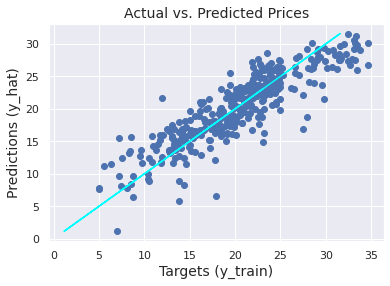

In [424]:
# Original Regression of Actual vs. Predicted Prices
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)
plt.title('Actual vs. Predicted Prices', fontsize=14)
plt.xlabel('Targets (y_train)',size=14)
plt.ylabel('Predictions (y_hat)',size=14)
plt.plot(y_hat, y_hat, color='cyan') 
plt.show()

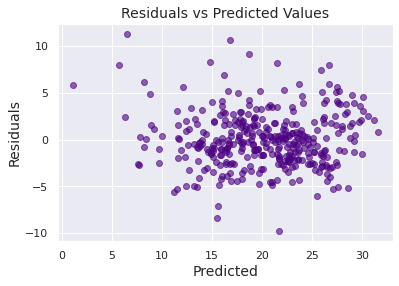

In [425]:
# Residuals vs Predicted values
residuals = (y_train - y_hat)
plt.scatter(x=y_hat, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

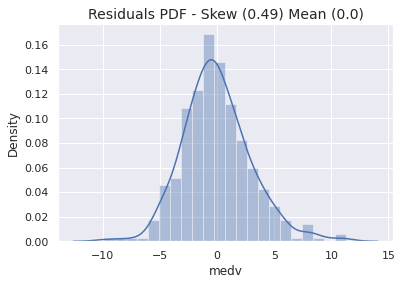

In [426]:
# Residuals plot
residuals_skew = round(residuals.skew(), 2)
residuals_mean = round(residuals.mean(), 2)
plt.title(f'Residuals PDF - Skew ({residuals_skew}) Mean ({residuals_mean})', size=14)
sns.distplot(residuals)
plt.show()

## Checking model using test data

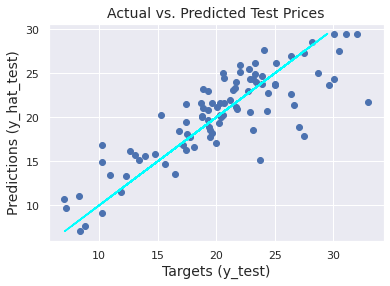

In [427]:
# Original Regression of Actual vs. Predicted Test Prices
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test)
plt.title('Actual vs. Predicted Test Prices', fontsize=14)
plt.xlabel('Targets (y_test)',size=14)
plt.ylabel('Predictions (y_hat_test)',size=14)
plt.plot(y_hat_test, y_hat_test, color='cyan') 
plt.show()

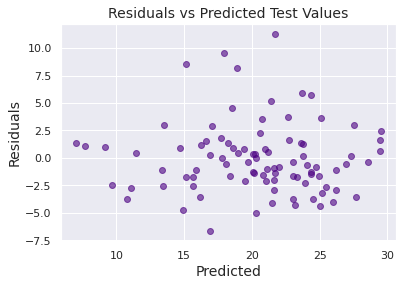

In [428]:
# Residuals vs Predicted values
residuals_test = y_test - y_hat_test
plt.scatter(x=y_hat_test, y=residuals_test, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Test Values', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

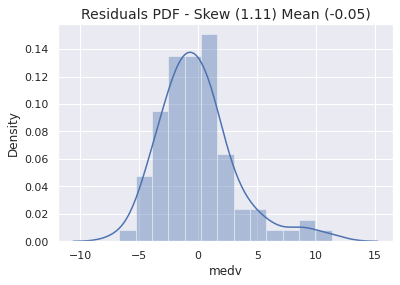

In [429]:
# Residuals plot
residuals_test_skew = round(residuals_test.skew(), 2)
residuals_test_mean = round(residuals_test.mean(), 2)
plt.title(f'Residuals PDF - Skew ({residuals_test_skew}) Mean ({residuals_test_mean})', size=14)
sns.distplot(residuals_test)
plt.show()

In [430]:
y_test

259    30.1
136    17.4
121    20.3
353    30.1
68     17.4
       ... 
91     22.0
156    13.1
84     23.9
59     19.6
215    25.0
Name: medv, Length: 91, dtype: float64

In [431]:
## Checking model using test data
data_check = pd.DataFrame(y_test, columns=['price_test_org'])
data_check['price_test_org'] = y_test
data_check['price_test_reg_prediction'] = y_hat_test
data_check['price_test_reg_prediction'] = round(data_check['price_test_reg_prediction'], 1)
data_check['Difference'] = round(y_test - y_hat_test, 1)
data_check['%Difference'] = round(data_comp['Difference'] / data_comp['price_test_org'], 2)
data_check

,price_test_org,price_test_reg_prediction,Difference,%Difference
259,30.1,29.4,0.7,0.02
136,17.4,16.3,1.1,0.07
121,20.3,21.7,-1.4,-0.07
353,30.1,24.4,5.7,0.19
68,17.4,19.5,-2.1,-0.12
...,...,...,...,...
91,22.0,25.2,-3.2,-0.14
156,13.1,15.7,-2.6,-0.20
84,23.9,23.7,0.2,0.01
59,19.6,21.6,-2.0,-0.10


In [432]:
data_check_error = round(data_check['%Difference'].mean()*100, 2)
print(f'Average model error is: {data_check_error}%.')

Average model error is: -2.99%.


## Making predictions

In [433]:
# General model check - prediction based on average values
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
medv_mean = round(data.medv.mean(),2)
medv_estimate = round(reg.predict(property_stats)[0],2)
print(f'Data medv average is: {medv_mean} vs prediction based on average data: {medv_estimate}.')


Data medv average is: 20.22 vs prediction based on average data: 20.23.


In [434]:
# Making prediction based on given data
data = {
    'crim': 3.905973,
    'zn': 9.774725,
    'indus': 11.647297,
    'chas': 0.059341,
    'nox': 0.559773,
    'rm': 6.150982,
    'age': 69.472747,
    'dis': 3.794176,
    'rad': 9.883516,
    'tax': 418.336264,
    'ptratio': 18.688352,
    'b': 353.238769,
    'lstat': 13.553429}
prediction_data = pd.DataFrame(data, index=['first_data'])

prediction_result = reg.predict(prediction_data)
prediction_data['prediction'] = prediction_result
print(f'Prediction result for given data is: {prediction_result}.')
prediction_data

Prediction result for given data is: [20.23384457].


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,prediction
first_data,3.905973,9.774725,11.647297,0.059341,0.559773,6.150982,69.472747,3.794176,9.883516,418.336264,18.688352,353.238769,13.553429,20.233845
